In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import joblib

In [2]:
data = pd.read_csv("Data/cleaned_data.csv")
data = data.drop("Unnamed: 0",axis=1)
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,Male,39,Higher Degree,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,High School Diploma/GED,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,High School,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,College,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,College,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,Male,68,High School,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3846,Male,50,High School,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3847,Male,51,College,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3848,Female,48,High School Diploma/GED,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


### Problems :
1 - Convert Categorical data into numerical
    * Label Encoder > high school :1 , college : 2 , Diploma : 3
    * One Hot Encoder > 

2 - unbalanced data
     1 - UnderSampling
     2 - OverSampling
     3 - Smote
3 - Normalization , Scaling

In [3]:
# categorical = []
# numerical = []
# for col in data.columns:
#     if data[col].dtype == "O":
#         categorical.append(col)
#     else:
#         numerical.append(col)        

In [4]:
categorical = [col for col in data.columns if data[col].dtype == "O"]
categorical

['gender', 'education']

In [5]:
numerical = [col for col in data.columns if data[col].dtype != "O"]
numerical = numerical[0:-1]
numerical

['age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
X = data.drop('target', axis=1)
Y = data['target']

In [11]:
list(Y).count(0)  / len(Y) ,  list(Y).count(1)  / len(Y)

(0.8457142857142858, 0.15428571428571428)

In [13]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)

In [27]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((5534, 19), (578, 19), (5534,), (578,))

In [14]:
list(y_train).count(0)  / len(y_train) ,  list(y_train).count(1)  / len(y_train)

(0.8456601466992665, 0.1543398533007335)

In [15]:
list(y_test).count(0)  / len(y_test) ,  list(y_test).count(1)  / len(y_test)

(0.8460207612456747, 0.15397923875432526)

In [6]:
ros = RandomOverSampler()

In [18]:
x_train, y_train = ros.fit_resample(x_train,y_train)

In [19]:
list(y_train).count(1) , list(y_train).count(0)

(2767, 2767)

In [22]:
pipeline = ColumnTransformer([("scaler", StandardScaler() ,numerical ),
                              # [red , green , blue ] > [1 , 0, 0 ] 
                               ("encoder", OneHotEncoder() , categorical)
                             ])

In [23]:
# [high school , college , ss] > [ 1 , 0 , 0]
# [college] > [1]

In [24]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test) 

In [99]:
joblib.dump(pipeline, "pipeline.joblib")

['pipeline.joblib']

In [28]:
x_train.shape

(5534, 19)

In [76]:
models = {"random_forest":RandomForestClassifier(), "tree":DecisionTreeClassifier(),
          "XGB" : XGBClassifier(**{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}), "Logistic":LogisticRegression()}

In [77]:
from sklearn.metrics import accuracy_score





 random_forest
Training Accuracy is 1.0
Accuracy Score is 0.8477508650519031
Training F1 Score is 1.0
Testing F1 Score is 0.24137931034482754
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       489
           1       0.52      0.16      0.24        89

    accuracy                           0.85       578
   macro avg       0.69      0.57      0.58       578
weighted avg       0.81      0.85      0.81       578



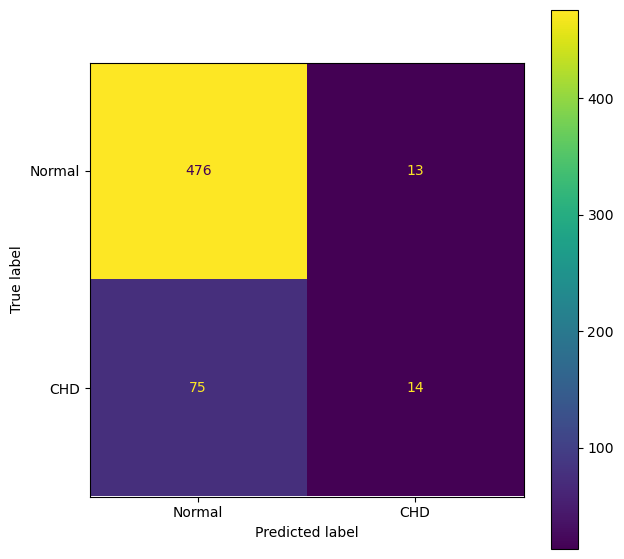





 tree
Training Accuracy is 1.0
Accuracy Score is 0.7560553633217993
Training F1 Score is 1.0
Testing F1 Score is 0.18497109826589594
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       489
           1       0.19      0.18      0.18        89

    accuracy                           0.76       578
   macro avg       0.52      0.52      0.52       578
weighted avg       0.75      0.76      0.75       578



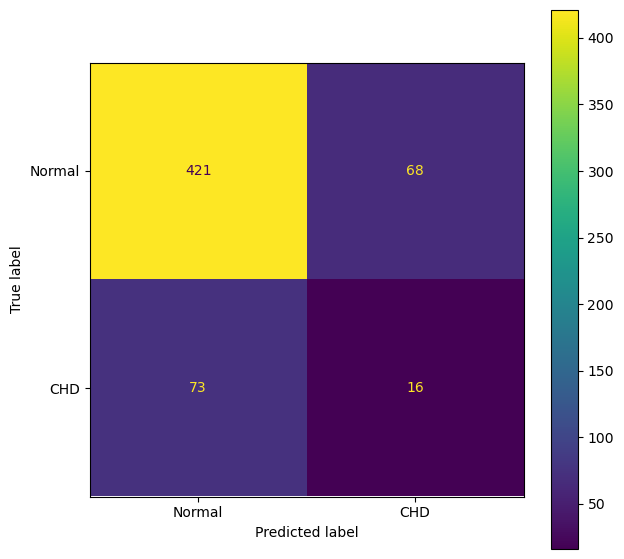





 XGB
Training Accuracy is 0.7276834116371521
Accuracy Score is 0.6920415224913494
Training F1 Score is 0.7347298010913572
Testing F1 Score is 0.39864864864864863
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       489
           1       0.29      0.66      0.40        89

    accuracy                           0.69       578
   macro avg       0.60      0.68      0.60       578
weighted avg       0.82      0.69      0.73       578



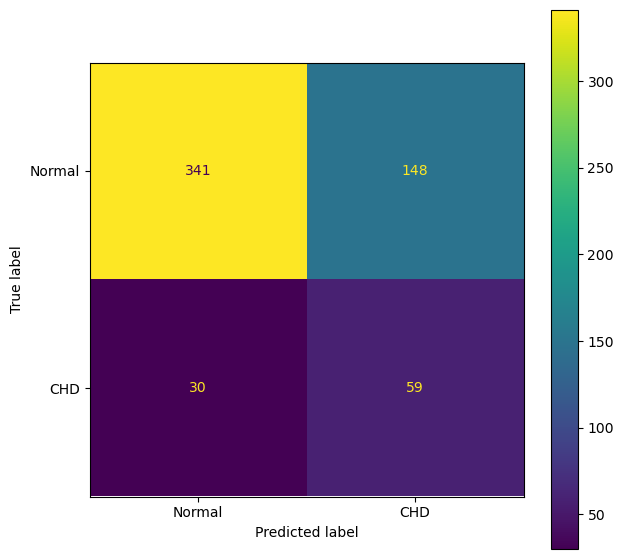





 Logistic
Training Accuracy is 0.6754607878568847
Accuracy Score is 0.6816608996539792
Training F1 Score is 0.6776740847092607
Testing F1 Score is 0.4064516129032258
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       489
           1       0.29      0.71      0.41        89

    accuracy                           0.68       578
   macro avg       0.61      0.69      0.59       578
weighted avg       0.83      0.68      0.72       578



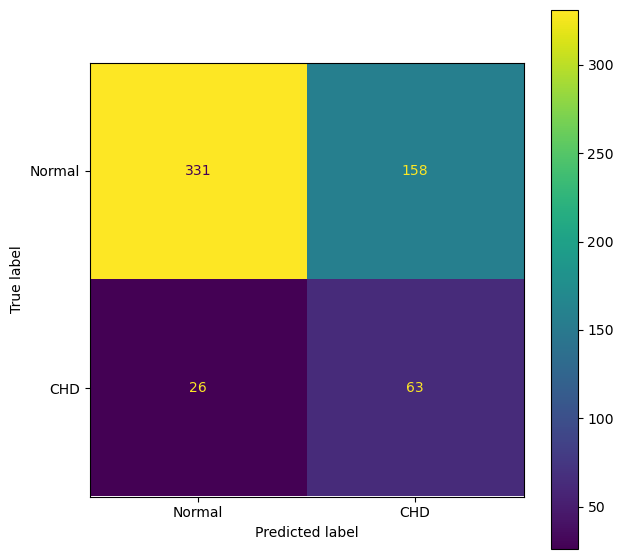

In [81]:
for name, model in models.items():
    print("\n\n\n\n",name)
    model.fit(x_train, y_train)
    
    print(F"Training Accuracy is {model.score(x_train, y_train)}")
    y_pred = model.predict(x_test)
    print(f"Accuracy Score is {accuracy_score(y_pred, y_test)}")
    y_pred_train = model.predict(x_train)
    
    print(f"Training F1 Score is {f1_score(y_pred_train, y_train)}")

    print(f"Testing F1 Score is {f1_score(y_pred, y_test)}")
    print(classification_report(y_test, y_pred))  
    # specify axis with  figure size 
    fig,ax = plt.subplots(figsize=(7,7))
    # getting confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    # confusionMatraxDisplay is used to create a confusion matrix plot from confusion
    display_con = ConfusionMatrixDisplay(confusion,display_labels=['Normal',"CHD"])
    # the confusion matrix with respect to axis defined above
    display_con.plot(ax=ax)
    plt.show()

In [80]:
# overfitting  > Training acc is very high , testing > low 
    * Simple models
    * Regu
    * increase data
    * Drop out
    * Pruening

# under fitting > training  is low , testing is low 
    * Complex Model
    * Ensemble Models

In [79]:
# hyper Parameter tuning 
# randomsearch > [100,200] , critation ("gini , "entropy]
# grid Search  > [100,200] , critation ("gini , "entropy] 

In [72]:
# Simple Model 
# Regulerization 
# increase data
# 

In [43]:
from sklearn.model_selection import RandomizedSearchCV


In [46]:
logistic_regression = LogisticRegression()
param_grid = {
    'C': np.logspace(-4, 4, 20),  # regularization parameter
    'penalty': ['l1', 'l2'],      # regularization type
    'solver': ['liblinear'],       # algorithm for optimization
    'max_iter': [100, 200, 300]    # maximum number of iterations
}


In [48]:
# data > [][][][][]

In [59]:
random_search = RandomizedSearchCV(
    logistic_regression,
    param_distributions=param_grid,
    n_iter=10,           # number of parameter settings that are sampled
    cv=10,                # number of cross-validation folds
    random_state=42,
    scoring='f1'# random seed for reproducibility
)

random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='f1')

In [60]:
# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Print the best score (mean cross-validated score of the best estimator)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 0.03359818286283781}
Best Score:  0.6763378546915936


In [61]:
lr = LogisticRegression(**{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 0.03359818286283781})

Training Accuracy is 0.6770870979400072
F1 Score is 0.4064516129032258
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       489
           1       0.29      0.71      0.41        89

    accuracy                           0.68       578
   macro avg       0.61      0.69      0.59       578
weighted avg       0.83      0.68      0.72       578



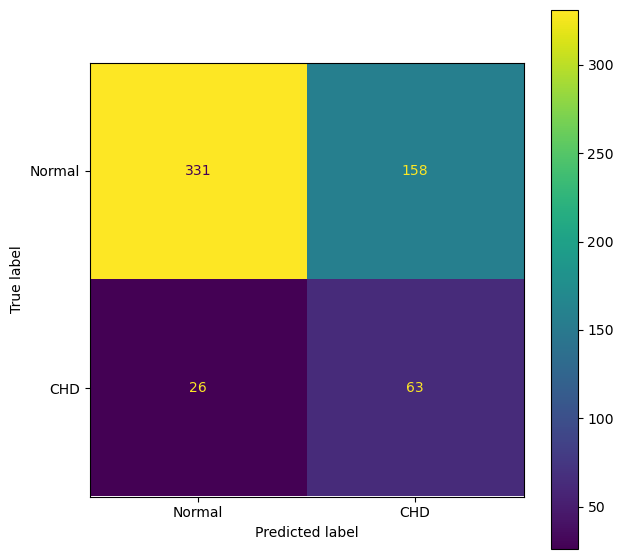

In [62]:
lr.fit(x_train, y_train)
print(F"Training Accuracy is {lr.score(x_train, y_train)}")
y_pred = lr.predict(x_test)
print(f"F1 Score is {f1_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred))  
# specify axis with  figure size 
fig,ax = plt.subplots(figsize=(7,7))
# getting confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# confusionMatraxDisplay is used to create a confusion matrix plot from confusion
display_con = ConfusionMatrixDisplay(confusion,display_labels=['Normal',"CHD"])
# the confusion matrix with respect to axis defined above
display_con.plot(ax=ax)
plt.show()

In [64]:
xgb_model = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [40,50, 60, 70],
    'max_depth': [3,3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='f1',  # Set scoring metric to F1 score
    random_state=42
)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Print the best F1 score
print("Best F1 Score: ", random_search.best_score_)


Best Hyperparameters:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Best F1 Score:  0.8888969629840375


In [111]:
xgb =  XGBClassifier(**random_search.best_params_)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [112]:
joblib.dump(xgb, "best_model.joblib")

['best_model.joblib']

In [113]:
del xgb

### Deployment 
 * Json : {"gender":"male", "eduation":"high School" , age : 18}
 * data frame : apply the same transformation that was applied to training data

In [114]:
input_data = {'gender': 'Male',
 'age': 39,
 'education': 'Higher Degree',
 'currentSmoker': 0,
 'cigsPerDay': 0.0,
 'BPMeds': 0.0,
 'prevalentStroke': 0,
 'prevalentHyp': 0,
 'diabetes': 0,
 'totChol': 195.0,
 'sysBP': 106.0,
 'diaBP': 70.0,
 'BMI': 26.97,
 'heartRate': 80.0,
 'glucose': 77.0}

In [115]:
del pipeline

In [116]:
pipeline = joblib.load("pipeline.joblib")

In [117]:
pipeline

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 ['age', 'currentSmoker', 'cigsPerDay',
                                  'BPMeds', 'prevalentStroke', 'prevalentHyp',
                                  'diabetes', 'totChol', 'sysBP', 'diaBP',
                                  'BMI', 'heartRate', 'glucose']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'education'])])

In [118]:
model = joblib.load("best_model.joblib")

In [129]:
def perform_prediction(input_data, pipeline, model):
    
    intput_df = pd.DataFrame(input_data, index=[0])
    
    preprocessed_data = pipeline.transform(intput_df)
    
    prediction = model.predict(preprocessed_data)
    
    return {"prediction":prediction[0]}

In [130]:
perform_prediction(input_data,pipeline,model)

{'prediction': 0}